# Estadística Aplicada a Inteligencia Artificial

Este notebook cubre los conceptos fundamentales de estadística orientados al tratamiento de datos e inteligencia artificial.

## Introducción

La estadística es fundamental en ciencia de datos e IA para:
- **Análisis exploratorio de datos (EDA)**: Entender la estructura y características de los datos
- **Preprocesamiento**: Detectar y manejar valores atípicos, normalización
- **Evaluación de modelos**: Métricas de rendimiento, validación
- **Inferencia**: Tomar decisiones basadas en datos
- **Feature engineering**: Crear variables relevantes para modelos de ML


## Importar Librerías


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, uniform, expon, poisson, binom

# Configuración de visualización
try:
    plt.style.use('seaborn-v0_8')
except:
    plt.style.use('seaborn')
sns.set_palette("husl")
np.random.seed(42)  # Para reproducibilidad


## 1. Estadística Descriptiva

La estadística descriptiva resume y describe las características principales de un conjunto de datos.

### Medidas de Tendencia Central


Media: 40.20
Mediana: 38.00
Moda: 35 (aparece 2 veces)
Media recortada (10%): 39.62


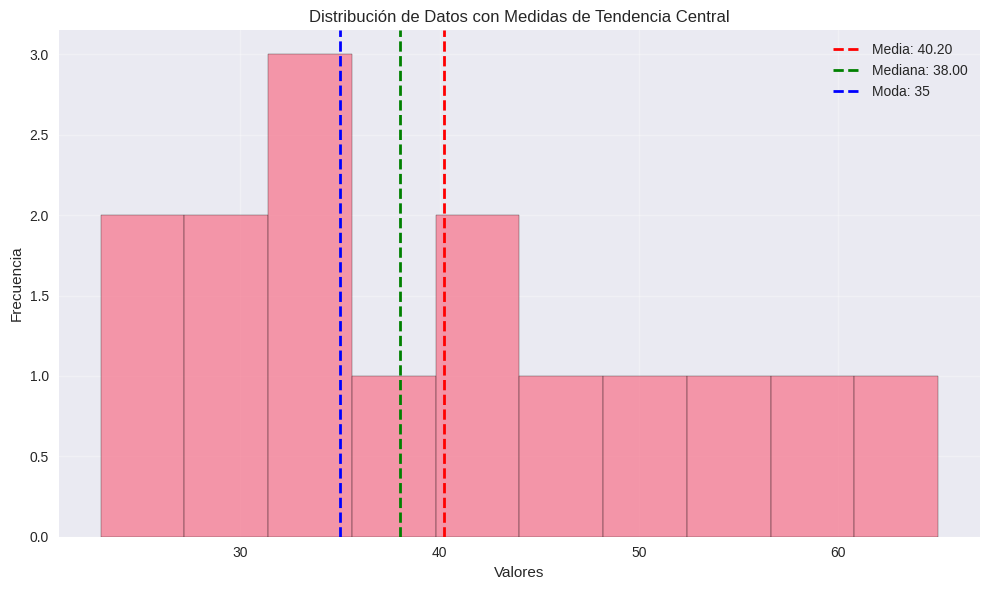

In [2]:
# Datos de ejemplo
datos = np.array([23, 25, 28, 30, 32, 35, 35, 38, 40, 42, 45, 50, 55, 60, 65])

# Media (promedio)
media = np.mean(datos)
print(f"Media: {media:.2f}")

# Mediana (valor central)
mediana = np.median(datos)
print(f"Mediana: {mediana:.2f}")

# Moda (valor más frecuente)
from scipy.stats import mode
moda_result = mode(datos, keepdims=True)
moda = moda_result.mode[0]
frecuencia = moda_result.count[0]
print(f"Moda: {moda} (aparece {frecuencia} veces)")

# Media recortada (elimina valores extremos)
media_recortada = stats.trim_mean(datos, 0.1)  # Elimina 10% de cada extremo
print(f"Media recortada (10%): {media_recortada:.2f}")

# Comparación visual
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(datos, bins=10, alpha=0.7, edgecolor='black')
ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
ax.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
ax.axvline(moda, color='blue', linestyle='--', linewidth=2, label=f'Moda: {moda}')
ax.set_xlabel('Valores')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de Datos con Medidas de Tendencia Central')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Medidas de Dispersión


Rango: 42
Varianza (población): 150.29
Varianza (muestra): 161.03
Desviación estándar (población): 12.26
Desviación estándar (muestra): 12.69
Coeficiente de variación: 30.50%
Q1 (percentil 25): 31.00
Q3 (percentil 75): 47.50
IQR: 16.50
MAD: 8.00


/tmp/ipykernel_167933/1866991673.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot([datos, datos_sin_outliers], labels=['Todos', 'Sin Outliers'],


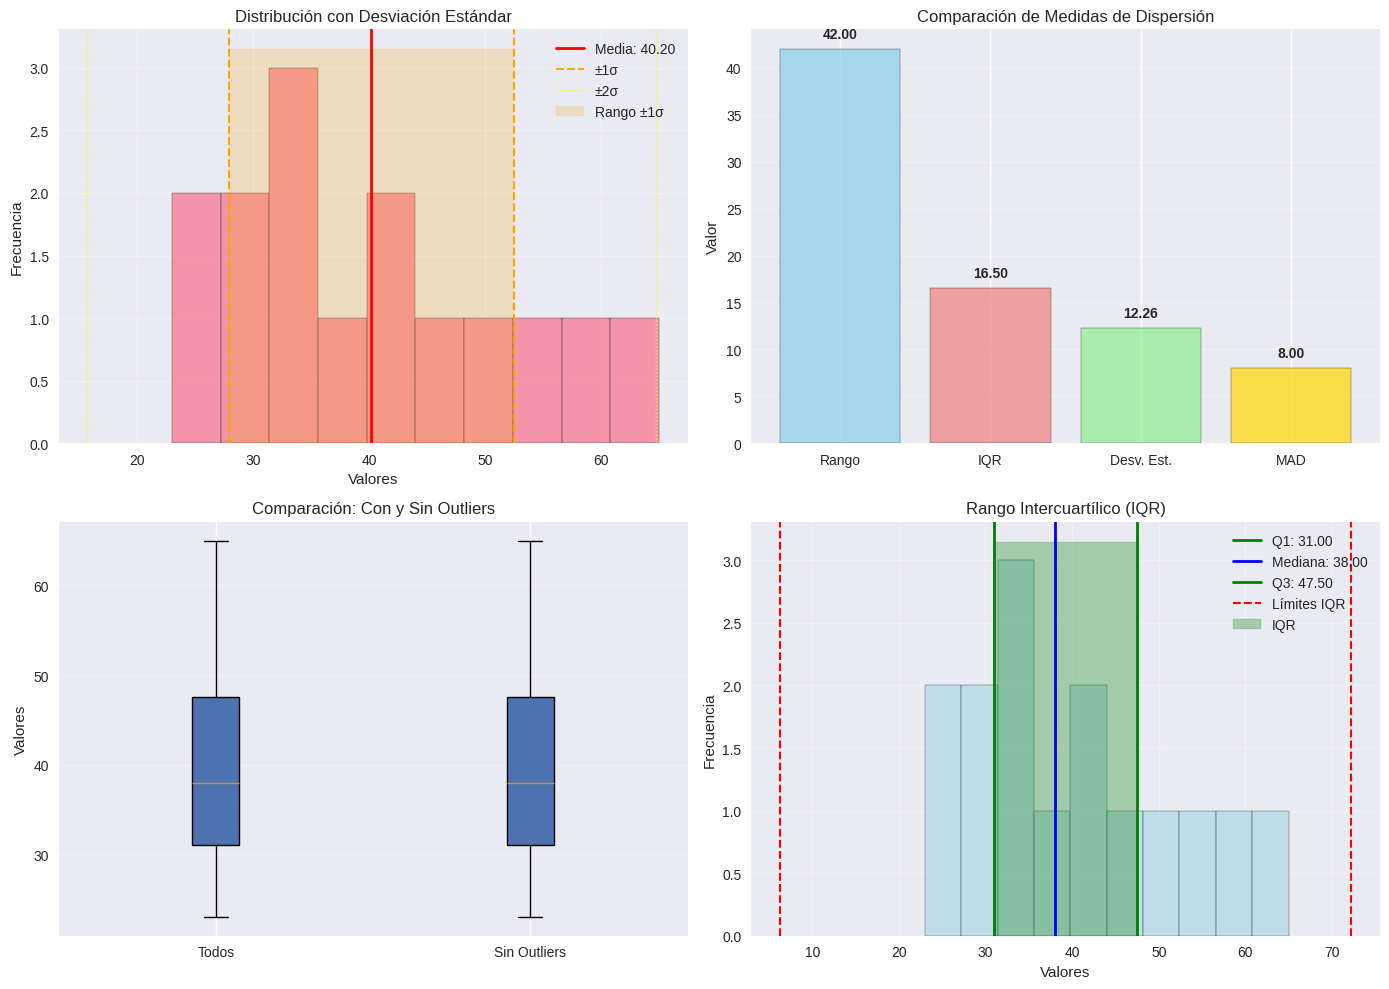

In [3]:
# Rango
rango = np.max(datos) - np.min(datos)
print(f"Rango: {rango}")

# Varianza (promedio de las diferencias al cuadrado respecto a la media)
varianza = np.var(datos, ddof=0)  # ddof=0 para población, ddof=1 para muestra
varianza_muestra = np.var(datos, ddof=1)
print(f"Varianza (población): {varianza:.2f}")
print(f"Varianza (muestra): {varianza_muestra:.2f}")

# Desviación estándar (raíz cuadrada de la varianza)
desv_estandar = np.std(datos, ddof=0)
desv_estandar_muestra = np.std(datos, ddof=1)
print(f"Desviación estándar (población): {desv_estandar:.2f}")
print(f"Desviación estándar (muestra): {desv_estandar_muestra:.2f}")

# Coeficiente de variación (CV) - desviación relativa
cv = (desv_estandar / media) * 100
print(f"Coeficiente de variación: {cv:.2f}%")

# Rango intercuartílico (IQR) - diferencia entre Q3 y Q1
q1 = np.percentile(datos, 25)
q3 = np.percentile(datos, 75)
iqr = q3 - q1
print(f"Q1 (percentil 25): {q1:.2f}")
print(f"Q3 (percentil 75): {q3:.2f}")
print(f"IQR: {iqr:.2f}")

# Desviación absoluta mediana (MAD) - robusta a outliers
mad = np.median(np.abs(datos - mediana))
print(f"MAD: {mad:.2f}")

# Visualización de medidas de dispersión
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histograma con desviación estándar
axes[0, 0].hist(datos, bins=10, alpha=0.7, edgecolor='black')
axes[0, 0].axvline(media, color='red', linestyle='-', linewidth=2, label=f'Media: {media:.2f}')
axes[0, 0].axvline(media - desv_estandar, color='orange', linestyle='--', linewidth=1.5, label=f'±1σ')
axes[0, 0].axvline(media + desv_estandar, color='orange', linestyle='--', linewidth=1.5)
axes[0, 0].axvline(media - 2*desv_estandar, color='yellow', linestyle=':', linewidth=1, label=f'±2σ')
axes[0, 0].axvline(media + 2*desv_estandar, color='yellow', linestyle=':', linewidth=1)
axes[0, 0].fill_between([media - desv_estandar, media + desv_estandar], 
                         axes[0, 0].get_ylim()[1], alpha=0.2, color='orange', label='Rango ±1σ')
axes[0, 0].set_xlabel('Valores')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución con Desviación Estándar')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Comparación de rangos
medidas = ['Rango', 'IQR', 'Desv. Est.', 'MAD']
valores = [rango, iqr, desv_estandar, mad]
colores = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
axes[0, 1].bar(medidas, valores, color=colores, edgecolor='black', alpha=0.7)
axes[0, 1].set_ylabel('Valor')
axes[0, 1].set_title('Comparación de Medidas de Dispersión')
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(valores):
    axes[0, 1].text(i, v + max(valores)*0.02, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# 3. Diagrama de cajas comparativo (con y sin outliers)
datos_sin_outliers = datos[(datos >= q1 - 1.5*iqr) & (datos <= q3 + 1.5*iqr)]
axes[1, 0].boxplot([datos, datos_sin_outliers], labels=['Todos', 'Sin Outliers'], 
                    patch_artist=True, vert=True)
axes[1, 0].set_ylabel('Valores')
axes[1, 0].set_title('Comparación: Con y Sin Outliers')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Visualización de IQR
axes[1, 1].hist(datos, bins=10, alpha=0.7, edgecolor='black', color='lightblue')
axes[1, 1].axvline(q1, color='green', linestyle='-', linewidth=2, label=f'Q1: {q1:.2f}')
axes[1, 1].axvline(mediana, color='blue', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')
axes[1, 1].axvline(q3, color='green', linestyle='-', linewidth=2, label=f'Q3: {q3:.2f}')
axes[1, 1].axvline(q1 - 1.5*iqr, color='red', linestyle='--', linewidth=1.5, label='Límites IQR')
axes[1, 1].axvline(q3 + 1.5*iqr, color='red', linestyle='--', linewidth=1.5)
axes[1, 1].fill_between([q1, q3], axes[1, 1].get_ylim()[1], alpha=0.3, color='green', label='IQR')
axes[1, 1].set_xlabel('Valores')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Rango Intercuartílico (IQR)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Cuartiles y Percentiles


Q1 (25%): 31.00
Q2 (50% - Mediana): 38.00
Q3 (75%): 47.50
Percentil 10: 26.20
Percentil 90: 58.00

Usando pandas quantile:
0.25    31.0
0.50    38.0
0.75    47.5
dtype: float64


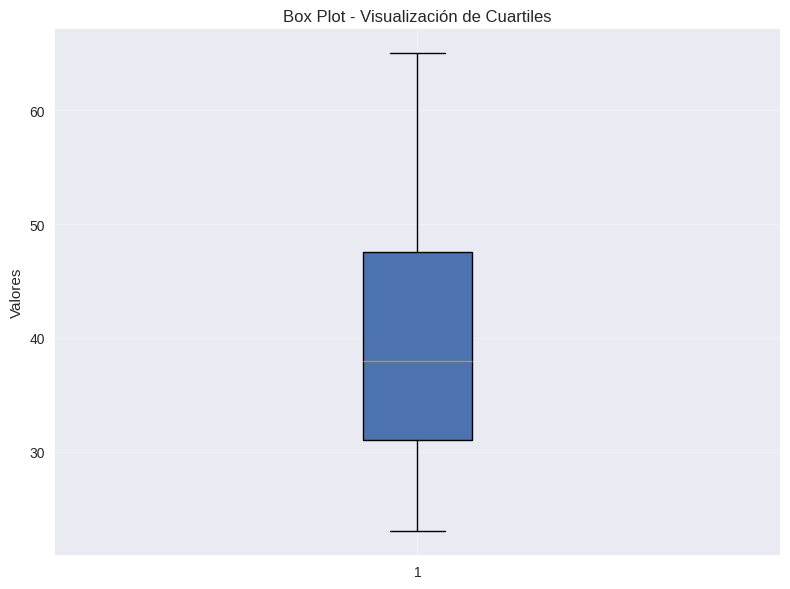

In [4]:
# Cuartiles
q1 = np.percentile(datos, 25)
q2 = np.percentile(datos, 50)  # Equivale a la mediana
q3 = np.percentile(datos, 75)

print(f"Q1 (25%): {q1:.2f}")
print(f"Q2 (50% - Mediana): {q2:.2f}")
print(f"Q3 (75%): {q3:.2f}")

# Percentiles específicos
p10 = np.percentile(datos, 10)
p90 = np.percentile(datos, 90)
print(f"Percentil 10: {p10:.2f}")
print(f"Percentil 90: {p90:.2f}")

# Usando quantile de pandas (más opciones)
serie = pd.Series(datos)
print(f"\nUsando pandas quantile:")
print(serie.quantile([0.25, 0.5, 0.75]))

# Box plot para visualizar cuartiles
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.boxplot(datos, vert=True, patch_artist=True)
ax.set_ylabel('Valores')
ax.set_title('Box Plot - Visualización de Cuartiles')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Resumen Estadístico Completo


Resumen estadístico completo:
         valores
count  15.000000
mean   40.200000
std    12.689703
min    23.000000
25%    31.000000
50%    38.000000
75%    47.500000
max    65.000000

Estadísticas adicionales:
Asimetría (skewness): 0.54
Curtosis: -0.73


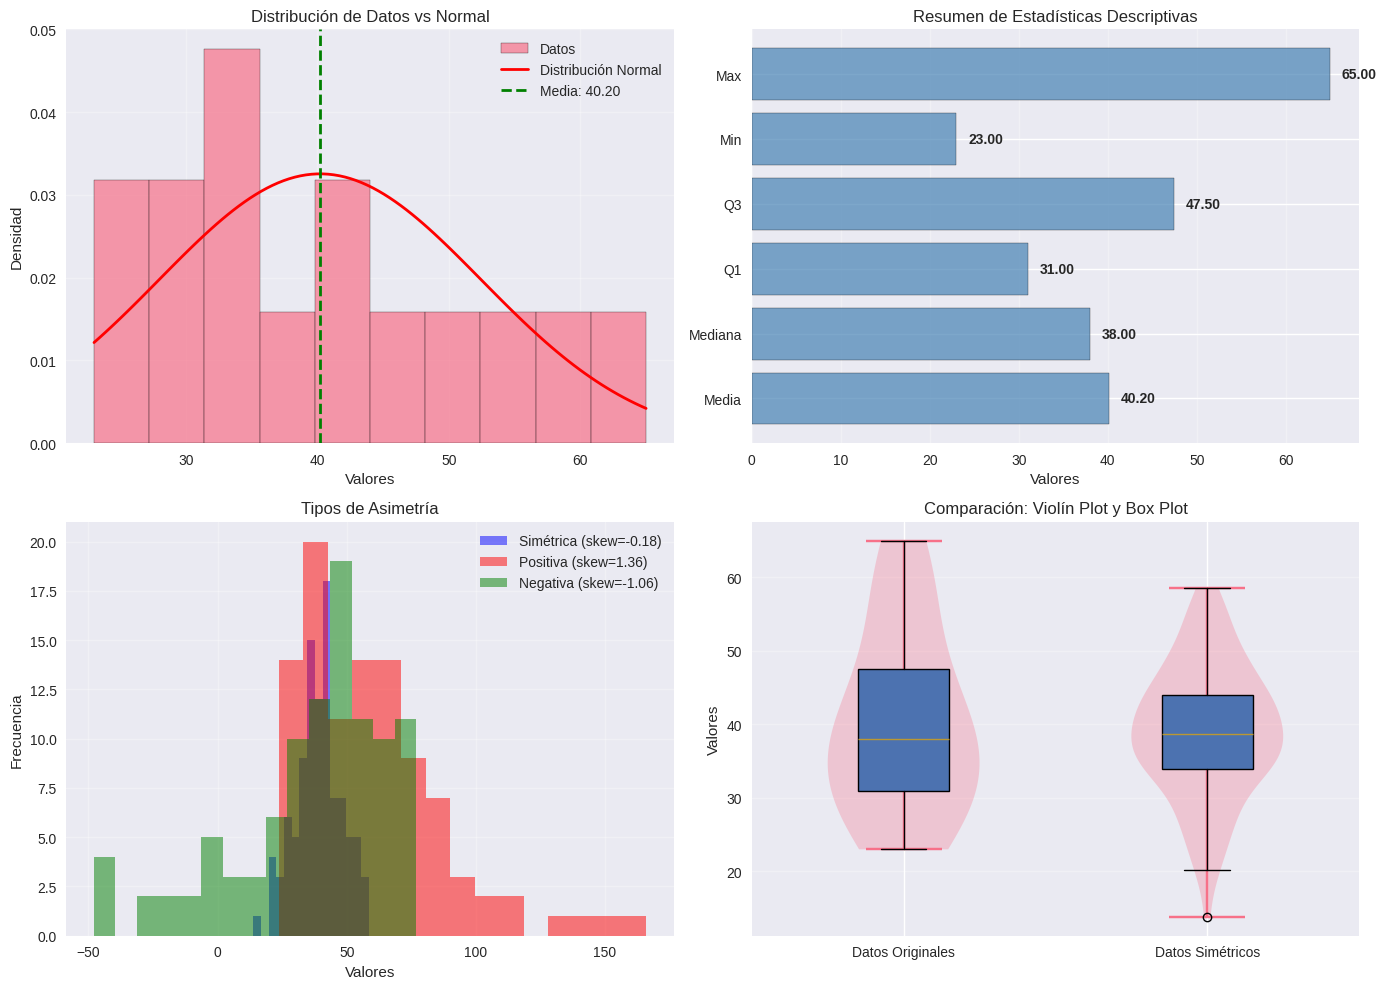


Interpretación:
- Asimetría positiva (0.54): La cola derecha es más larga
- Curtosis negativa (-0.73): Distribución más plana que la normal


In [5]:
# Usando pandas describe() - resumen completo
df = pd.DataFrame({'valores': datos})
resumen = df.describe()
print("Resumen estadístico completo:")
print(resumen)

# Estadísticas adicionales
asimetria = stats.skew(datos)
curtosis = stats.kurtosis(datos)
print(f"\nEstadísticas adicionales:")
print(f"Asimetría (skewness): {asimetria:.2f}")
print(f"Curtosis: {curtosis:.2f}")

# Asimetría: 
# > 0: sesgo positivo (cola derecha)
# < 0: sesgo negativo (cola izquierda)
# = 0: simétrica

# Curtosis:
# > 0: distribución más puntiaguda que la normal
# < 0: distribución más plana que la normal
# = 0: similar a la normal

# Visualización de asimetría y curtosis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histograma con curva normal superpuesta
axes[0, 0].hist(datos, bins=10, density=True, alpha=0.7, edgecolor='black', label='Datos')
# Curva normal teórica
x_norm = np.linspace(datos.min(), datos.max(), 100)
y_norm = norm.pdf(x_norm, media, desv_estandar)
axes[0, 0].plot(x_norm, y_norm, 'r-', linewidth=2, label='Distribución Normal')
axes[0, 0].axvline(media, color='green', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
axes[0, 0].set_xlabel('Valores')
axes[0, 0].set_ylabel('Densidad')
axes[0, 0].set_title('Distribución de Datos vs Normal')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Gráfico de barras del resumen estadístico
estadisticas = ['Media', 'Mediana', 'Q1', 'Q3', 'Min', 'Max']
valores_stats = [media, mediana, q1, q3, np.min(datos), np.max(datos)]
axes[0, 1].barh(estadisticas, valores_stats, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Valores')
axes[0, 1].set_title('Resumen de Estadísticas Descriptivas')
axes[0, 1].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(valores_stats):
    axes[0, 1].text(v + max(valores_stats)*0.02, i, f'{v:.2f}', va='center', fontweight='bold')

# 3. Visualización de asimetría
# Crear datos con diferentes asimetrías para comparación
datos_simetricos = np.random.normal(40, 10, 100)
datos_positivos = np.random.gamma(2, 2, 100) * 10 + 20
datos_negativos = 80 - np.random.gamma(2, 2, 100) * 10

skew_sim = stats.skew(datos_simetricos)
skew_pos = stats.skew(datos_positivos)
skew_neg = stats.skew(datos_negativos)

axes[1, 0].hist(datos_simetricos, bins=15, alpha=0.5, label=f'Simétrica (skew={skew_sim:.2f})', color='blue')
axes[1, 0].hist(datos_positivos, bins=15, alpha=0.5, label=f'Positiva (skew={skew_pos:.2f})', color='red')
axes[1, 0].hist(datos_negativos, bins=15, alpha=0.5, label=f'Negativa (skew={skew_neg:.2f})', color='green')
axes[1, 0].set_xlabel('Valores')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Tipos de Asimetría')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Diagrama de violín y box plot combinado
datos_comparacion = [datos, datos_simetricos]
axes[1, 1].violinplot(datos_comparacion, positions=[1, 2], showmeans=True, showmedians=True)
axes[1, 1].boxplot(datos_comparacion, positions=[1, 2], widths=0.3, patch_artist=True)
axes[1, 1].set_xticks([1, 2])
axes[1, 1].set_xticklabels(['Datos Originales', 'Datos Simétricos'])
axes[1, 1].set_ylabel('Valores')
axes[1, 1].set_title('Comparación: Violín Plot y Box Plot')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Mostrar interpretación de asimetría y curtosis
print(f"\nInterpretación:")
if asimetria > 0.5:
    print(f"- Asimetría positiva ({asimetria:.2f}): La cola derecha es más larga")
elif asimetria < -0.5:
    print(f"- Asimetría negativa ({asimetria:.2f}): La cola izquierda es más larga")
else:
    print(f"- Asimetría cercana a cero ({asimetria:.2f}): Distribución aproximadamente simétrica")

if curtosis > 0.5:
    print(f"- Curtosis positiva ({curtosis:.2f}): Distribución más puntiaguda que la normal")
elif curtosis < -0.5:
    print(f"- Curtosis negativa ({curtosis:.2f}): Distribución más plana que la normal")
else:
    print(f"- Curtosis cercana a cero ({curtosis:.2f}): Similar a la distribución normal")


## 2. Distribuciones de Probabilidad

Las distribuciones de probabilidad son fundamentales en estadística y ML para modelar datos y hacer inferencias.

### Distribución Normal (Gaussiana)


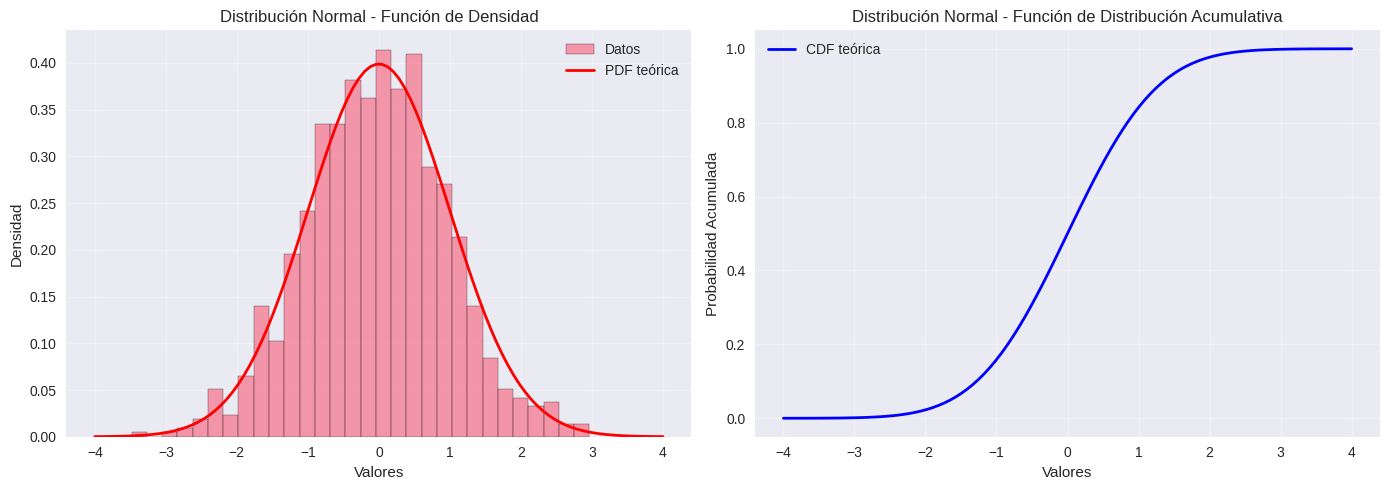

Media muestral: -0.03
Desviación estándar muestral: 0.99

P(X < 1): 0.8413
P(-1 < X < 1): 0.6827 (68% de los datos en ±1σ)


In [6]:
# Parámetros de la distribución normal
mu = 0      # Media
sigma = 1   # Desviación estándar

# Generar datos de una distribución normal
datos_normales = np.random.normal(mu, sigma, 1000)

# Función de densidad de probabilidad (PDF)
x = np.linspace(-4, 4, 100)
pdf = norm.pdf(x, mu, sigma)

# Función de distribución acumulativa (CDF)
cdf = norm.cdf(x, mu, sigma)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma y PDF
axes[0].hist(datos_normales, bins=30, density=True, alpha=0.7, edgecolor='black', label='Datos')
axes[0].plot(x, pdf, 'r-', linewidth=2, label='PDF teórica')
axes[0].set_xlabel('Valores')
axes[0].set_ylabel('Densidad')
axes[0].set_title('Distribución Normal - Función de Densidad')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# CDF
axes[1].plot(x, cdf, 'b-', linewidth=2, label='CDF teórica')
axes[1].set_xlabel('Valores')
axes[1].set_ylabel('Probabilidad Acumulada')
axes[1].set_title('Distribución Normal - Función de Distribución Acumulativa')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas
print(f"Media muestral: {np.mean(datos_normales):.2f}")
print(f"Desviación estándar muestral: {np.std(datos_normales):.2f}")

# Probabilidades
prob_menor_1 = norm.cdf(1, mu, sigma)
prob_entre = norm.cdf(1, mu, sigma) - norm.cdf(-1, mu, sigma)
print(f"\nP(X < 1): {prob_menor_1:.4f}")
print(f"P(-1 < X < 1): {prob_entre:.4f} (68% de los datos en ±1σ)")


### Otras Distribuciones Comunes


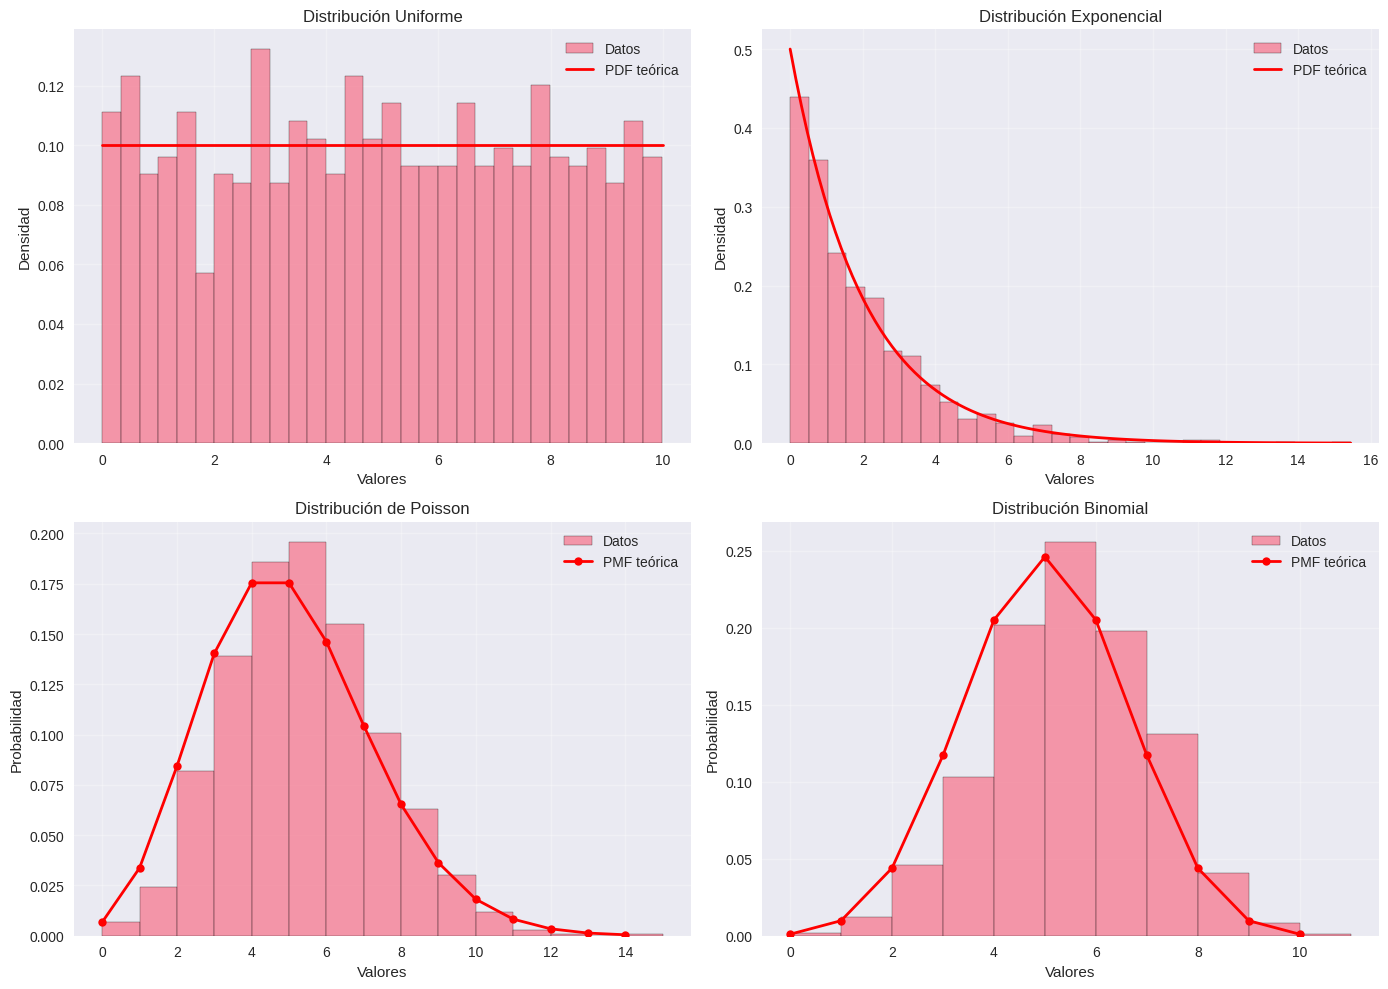

Estadísticas de las distribuciones:

Uniforme: Media=4.98, Std=2.88
Exponencial: Media=1.95, Std=1.93
Poisson: Media=4.92, Std=2.04
Binomial: Media=5.02, Std=1.59


In [7]:
# Distribución Uniforme
datos_uniforme = np.random.uniform(0, 10, 1000)
x_uniforme = np.linspace(0, 10, 100)
pdf_uniforme = uniform.pdf(x_uniforme, loc=0, scale=10)

# Distribución Exponencial (tiempos entre eventos)
scale_exp = 2
datos_exponencial = np.random.exponential(scale=scale_exp, size=1000)
x_exponencial = np.linspace(0, datos_exponencial.max(), 100)
pdf_exponencial = expon.pdf(x_exponencial, scale=scale_exp)

# Distribución de Poisson (conteos discretos)
lam_poisson = 5
datos_poisson = np.random.poisson(lam=lam_poisson, size=1000)
x_poisson = np.arange(0, datos_poisson.max() + 1)
pmf_poisson = poisson.pmf(x_poisson, lam_poisson)

# Distribución Binomial (éxitos en n intentos)
n_binom = 10
p_binom = 0.5
datos_binomial = np.random.binomial(n=n_binom, p=p_binom, size=1000)
x_binomial = np.arange(0, n_binom + 1)
pmf_binomial = binom.pmf(x_binomial, n=n_binom, p=p_binom)

# Visualización con PDFs/PMFs teóricas superpuestas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribución Uniforme
axes[0, 0].hist(datos_uniforme, bins=30, density=True, alpha=0.7, edgecolor='black', label='Datos')
axes[0, 0].plot(x_uniforme, pdf_uniforme, 'r-', linewidth=2, label='PDF teórica')
axes[0, 0].set_title('Distribución Uniforme')
axes[0, 0].set_xlabel('Valores')
axes[0, 0].set_ylabel('Densidad')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Distribución Exponencial
axes[0, 1].hist(datos_exponencial, bins=30, density=True, alpha=0.7, edgecolor='black', label='Datos')
axes[0, 1].plot(x_exponencial, pdf_exponencial, 'r-', linewidth=2, label='PDF teórica')
axes[0, 1].set_title('Distribución Exponencial')
axes[0, 1].set_xlabel('Valores')
axes[0, 1].set_ylabel('Densidad')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Distribución de Poisson
counts, bins, _ = axes[1, 0].hist(datos_poisson, bins=range(0, datos_poisson.max()+2), 
                                   density=True, alpha=0.7, edgecolor='black', label='Datos')
axes[1, 0].plot(x_poisson, pmf_poisson, 'ro-', linewidth=2, markersize=6, label='PMF teórica')
axes[1, 0].set_title('Distribución de Poisson')
axes[1, 0].set_xlabel('Valores')
axes[1, 0].set_ylabel('Probabilidad')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Distribución Binomial
counts, bins, _ = axes[1, 1].hist(datos_binomial, bins=range(0, n_binom+2), 
                                   density=True, alpha=0.7, edgecolor='black', label='Datos')
axes[1, 1].plot(x_binomial, pmf_binomial, 'ro-', linewidth=2, markersize=6, label='PMF teórica')
axes[1, 1].set_title('Distribución Binomial')
axes[1, 1].set_xlabel('Valores')
axes[1, 1].set_ylabel('Probabilidad')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas de cada distribución
print("Estadísticas de las distribuciones:")
print(f"\nUniforme: Media={np.mean(datos_uniforme):.2f}, Std={np.std(datos_uniforme):.2f}")
print(f"Exponencial: Media={np.mean(datos_exponencial):.2f}, Std={np.std(datos_exponencial):.2f}")
print(f"Poisson: Media={np.mean(datos_poisson):.2f}, Std={np.std(datos_poisson):.2f}")
print(f"Binomial: Media={np.mean(datos_binomial):.2f}, Std={np.std(datos_binomial):.2f}")


## 3. Correlación y Covarianza

La correlación mide la relación lineal entre dos variables. Es crucial en ML para:
- Detectar multicolinealidad
- Feature selection
- Análisis exploratorio


Covarianza (positiva): 1.590
Covarianza (negativa): -1.556
Covarianza (sin correlación): -0.137

Correlación de Pearson (positiva): 0.965
Correlación de Pearson (negativa): -0.955
Correlación de Pearson (sin correlación): -0.170


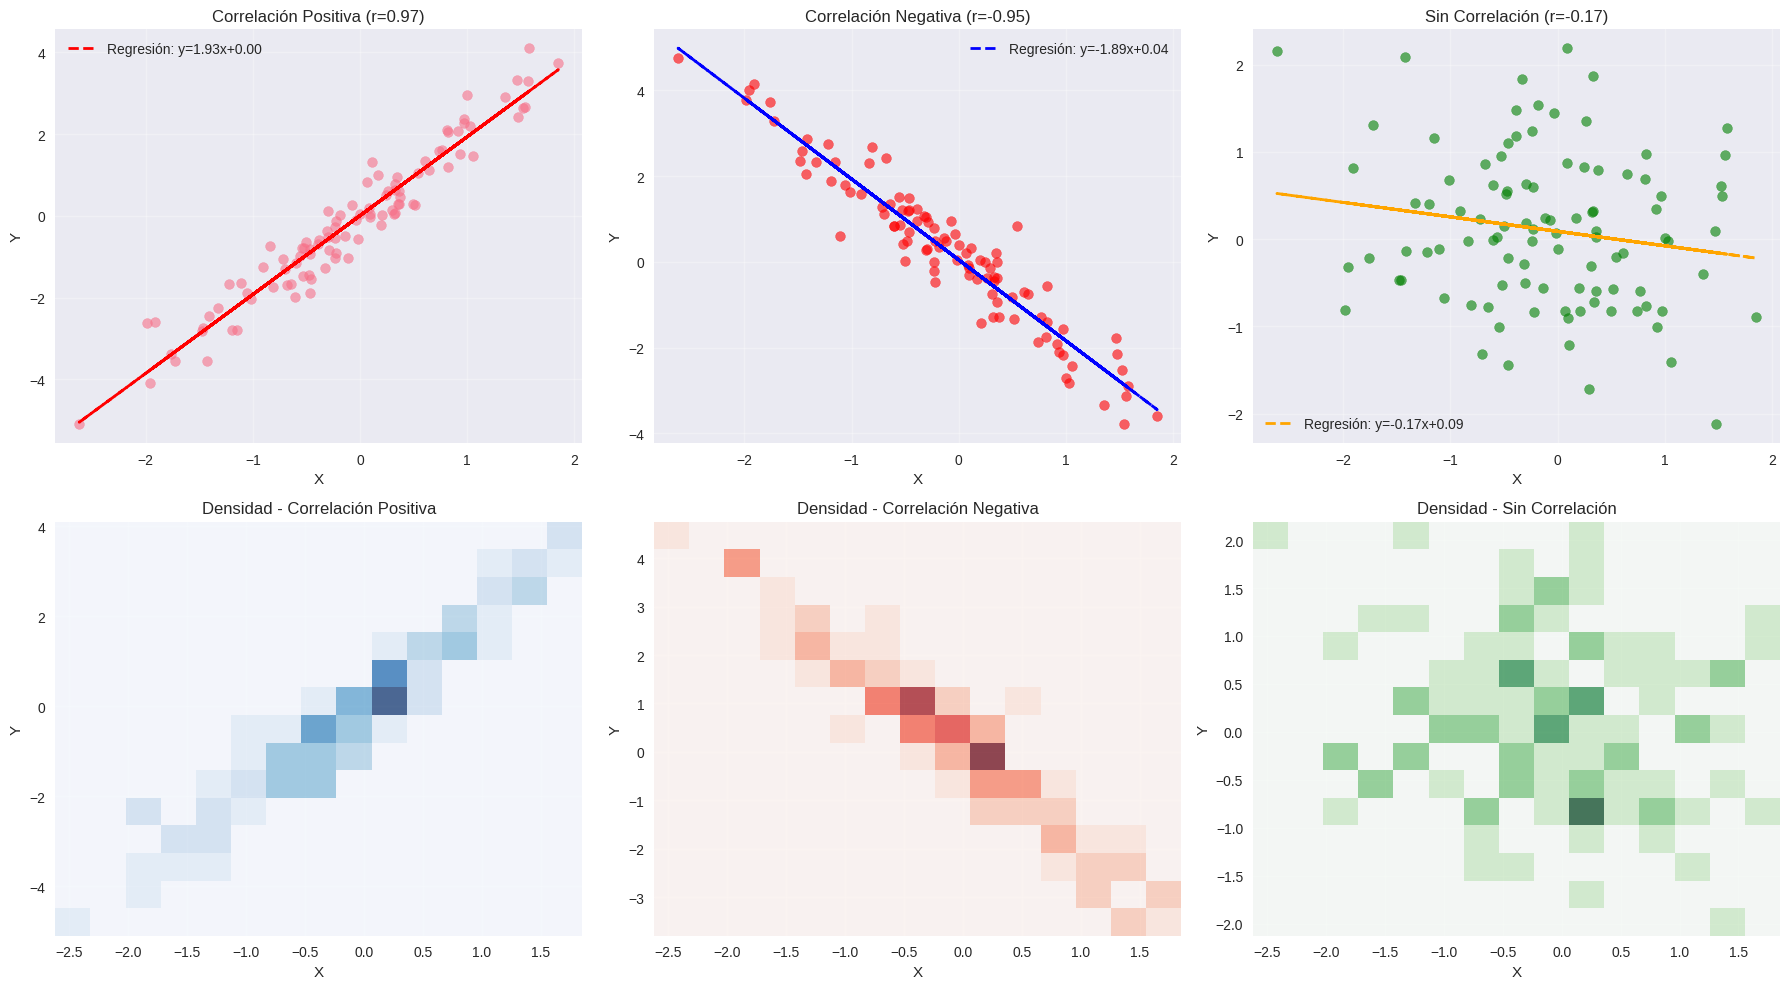

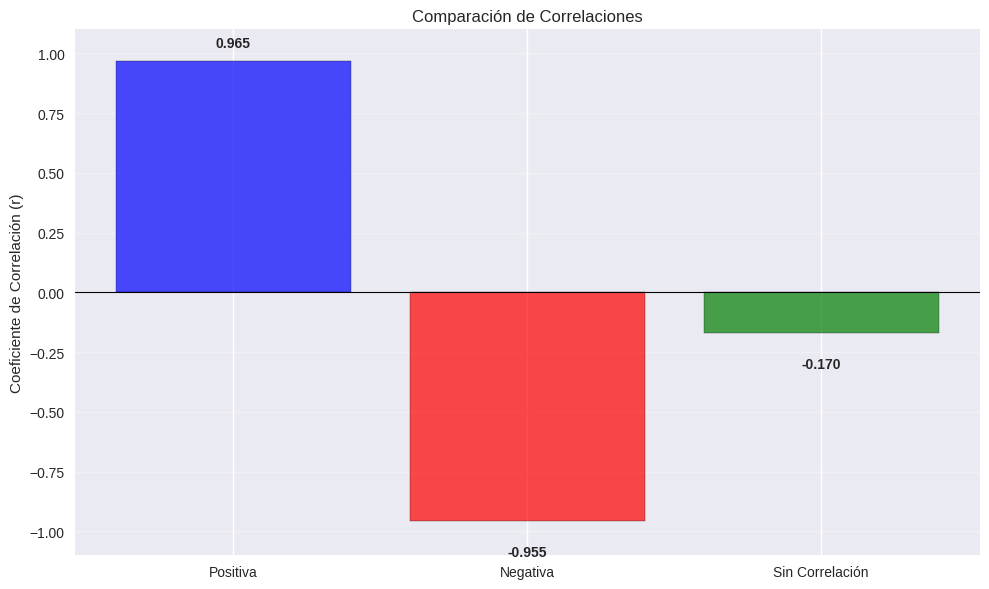

In [8]:
# Generar datos correlacionados
np.random.seed(42)
n = 100
x = np.random.normal(0, 1, n)
y_positiva = 2 * x + np.random.normal(0, 0.5, n)  # Correlación positiva
y_negativa = -2 * x + np.random.normal(0, 0.5, n)  # Correlación negativa
y_sin_corr = np.random.normal(0, 1, n)  # Sin correlación

# Covarianza
cov_pos = np.cov(x, y_positiva)[0, 1]
cov_neg = np.cov(x, y_negativa)[0, 1]
cov_sin = np.cov(x, y_sin_corr)[0, 1]

print(f"Covarianza (positiva): {cov_pos:.3f}")
print(f"Covarianza (negativa): {cov_neg:.3f}")
print(f"Covarianza (sin correlación): {cov_sin:.3f}")

# Correlación de Pearson (r)
corr_pos = np.corrcoef(x, y_positiva)[0, 1]
corr_neg = np.corrcoef(x, y_negativa)[0, 1]
corr_sin = np.corrcoef(x, y_sin_corr)[0, 1]

print(f"\nCorrelación de Pearson (positiva): {corr_pos:.3f}")
print(f"Correlación de Pearson (negativa): {corr_neg:.3f}")
print(f"Correlación de Pearson (sin correlación): {corr_sin:.3f}")

# Interpretación:
# r ≈ 1: correlación positiva fuerte
# r ≈ -1: correlación negativa fuerte
# r ≈ 0: sin correlación lineal

# Visualización mejorada
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Fila 1: Scatter plots con líneas de regresión
# Correlación positiva
z_pos = np.polyfit(x, y_positiva, 1)
p_pos = np.poly1d(z_pos)
axes[0, 0].scatter(x, y_positiva, alpha=0.6, s=50)
axes[0, 0].plot(x, p_pos(x), "r--", linewidth=2, label=f'Regresión: y={z_pos[0]:.2f}x+{z_pos[1]:.2f}')
axes[0, 0].set_title(f'Correlación Positiva (r={corr_pos:.2f})')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('Y')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Correlación negativa
z_neg = np.polyfit(x, y_negativa, 1)
p_neg = np.poly1d(z_neg)
axes[0, 1].scatter(x, y_negativa, alpha=0.6, color='red', s=50)
axes[0, 1].plot(x, p_neg(x), "b--", linewidth=2, label=f'Regresión: y={z_neg[0]:.2f}x+{z_neg[1]:.2f}')
axes[0, 1].set_title(f'Correlación Negativa (r={corr_neg:.2f})')
axes[0, 1].set_xlabel('X')
axes[0, 1].set_ylabel('Y')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Sin correlación
z_sin = np.polyfit(x, y_sin_corr, 1)
p_sin = np.poly1d(z_sin)
axes[0, 2].scatter(x, y_sin_corr, alpha=0.6, color='green', s=50)
axes[0, 2].plot(x, p_sin(x), "orange", linestyle='--', linewidth=2, 
                label=f'Regresión: y={z_sin[0]:.2f}x+{z_sin[1]:.2f}')
axes[0, 2].set_title(f'Sin Correlación (r={corr_sin:.2f})')
axes[0, 2].set_xlabel('X')
axes[0, 2].set_ylabel('Y')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Fila 2: Histogramas 2D (densidad)
axes[1, 0].hist2d(x, y_positiva, bins=15, cmap='Blues', alpha=0.7)
axes[1, 0].set_title('Densidad - Correlación Positiva')
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('Y')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist2d(x, y_negativa, bins=15, cmap='Reds', alpha=0.7)
axes[1, 1].set_title('Densidad - Correlación Negativa')
axes[1, 1].set_xlabel('X')
axes[1, 1].set_ylabel('Y')
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].hist2d(x, y_sin_corr, bins=15, cmap='Greens', alpha=0.7)
axes[1, 2].set_title('Densidad - Sin Correlación')
axes[1, 2].set_xlabel('X')
axes[1, 2].set_ylabel('Y')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Gráfico adicional: Comparación de valores de correlación
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
correlaciones = ['Positiva', 'Negativa', 'Sin Correlación']
valores_corr = [corr_pos, corr_neg, corr_sin]
colores_corr = ['blue', 'red', 'green']
bars = ax.bar(correlaciones, valores_corr, color=colores_corr, alpha=0.7, edgecolor='black')
ax.axhline(0, color='black', linestyle='-', linewidth=0.8)
ax.set_ylabel('Coeficiente de Correlación (r)')
ax.set_title('Comparación de Correlaciones')
ax.set_ylim(-1.1, 1.1)
ax.grid(True, alpha=0.3, axis='y')
for i, (bar, val) in enumerate(zip(bars, valores_corr)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.05 if height >= 0 else height - 0.1,
            f'{val:.3f}', ha='center', va='bottom' if height >= 0 else 'top', fontweight='bold')
plt.tight_layout()
plt.show()


### Matriz de Correlación


Matriz de Correlación:
                  edad  ingresos  experiencia  satisfaccion
edad          1.000000  0.752900     0.679349     -0.170227
ingresos      0.752900  1.000000     0.506219     -0.155293
experiencia   0.679349  0.506219     1.000000     -0.091552
satisfaccion -0.170227 -0.155293    -0.091552      1.000000


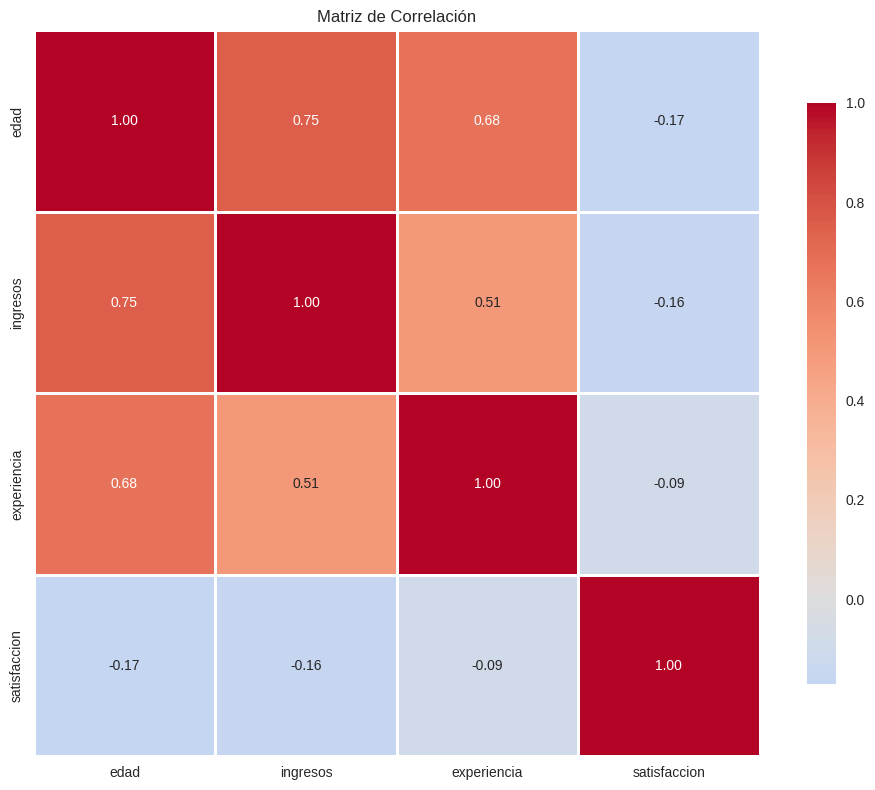

In [9]:
# Crear dataset con múltiples variables
np.random.seed(42)
df = pd.DataFrame({
    'edad': np.random.normal(35, 10, 100),
    'ingresos': np.random.normal(50000, 15000, 100),
    'experiencia': np.random.normal(10, 5, 100),
    'satisfaccion': np.random.normal(7, 2, 100)
})

# Añadir correlaciones artificiales
df['ingresos'] = df['edad'] * 1000 + df['ingresos'] * 0.5
df['experiencia'] = df['edad'] * 0.3 + df['experiencia'] * 0.7

# Matriz de correlación
matriz_corr = df.corr()
print("Matriz de Correlación:")
print(matriz_corr)

# Visualización con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()


## 4. Detección de Valores Atípicos (Outliers)

Los outliers pueden afectar significativamente los modelos de ML. Es importante detectarlos y manejarlos adecuadamente.


Método IQR:
Límite inferior: 27.17
Límite superior: 71.71
Outliers detectados: [ 23.80254896 120.         130.         -20.         -15.        ]

Método Z-score (umbral=3):
Outliers detectados: [120. 130. -20. -15.]


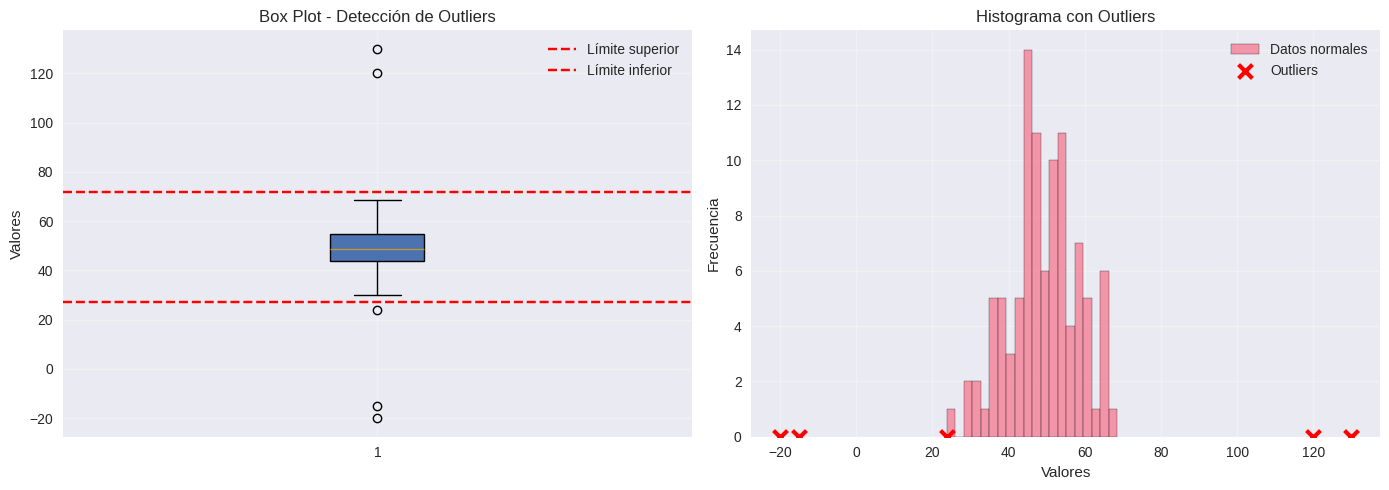

In [10]:
# Crear datos con outliers
np.random.seed(42)
datos_normales = np.random.normal(50, 10, 100)
outliers = np.array([120, 130, -20, -15])
datos_con_outliers = np.concatenate([datos_normales, outliers])

# Método 1: IQR (Rango Intercuartílico)
q1 = np.percentile(datos_con_outliers, 25)
q3 = np.percentile(datos_con_outliers, 75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers_iqr = datos_con_outliers[(datos_con_outliers < limite_inferior) | 
                                   (datos_con_outliers > limite_superior)]

print(f"Método IQR:")
print(f"Límite inferior: {limite_inferior:.2f}")
print(f"Límite superior: {limite_superior:.2f}")
print(f"Outliers detectados: {outliers_iqr}")

# Método 2: Z-score (desviaciones estándar)
z_scores = np.abs(stats.zscore(datos_con_outliers))
umbral_z = 3
outliers_zscore = datos_con_outliers[z_scores > umbral_z]

print(f"\nMétodo Z-score (umbral={umbral_z}):")
print(f"Outliers detectados: {outliers_zscore}")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
axes[0].boxplot(datos_con_outliers, vert=True, patch_artist=True)
axes[0].axhline(limite_superior, color='r', linestyle='--', label='Límite superior')
axes[0].axhline(limite_inferior, color='r', linestyle='--', label='Límite inferior')
axes[0].set_title('Box Plot - Detección de Outliers')
axes[0].set_ylabel('Valores')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Histograma con outliers marcados
axes[1].hist(datos_normales, bins=20, alpha=0.7, label='Datos normales', edgecolor='black')
axes[1].scatter(outliers_iqr, [0]*len(outliers_iqr), color='red', s=100, 
                marker='x', linewidths=3, label='Outliers', zorder=5)
axes[1].set_xlabel('Valores')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Histograma con Outliers')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Intervalos de Confianza

Los intervalos de confianza proporcionan un rango de valores donde probablemente se encuentra un parámetro poblacional.


Media muestral: 96.62
Desviación estándar muestral: 14.01

Intervalo de confianza del 95.0%:
[92.64, 100.60]
Margen de error: ±3.98

Usando scipy: [92.64, 100.60]


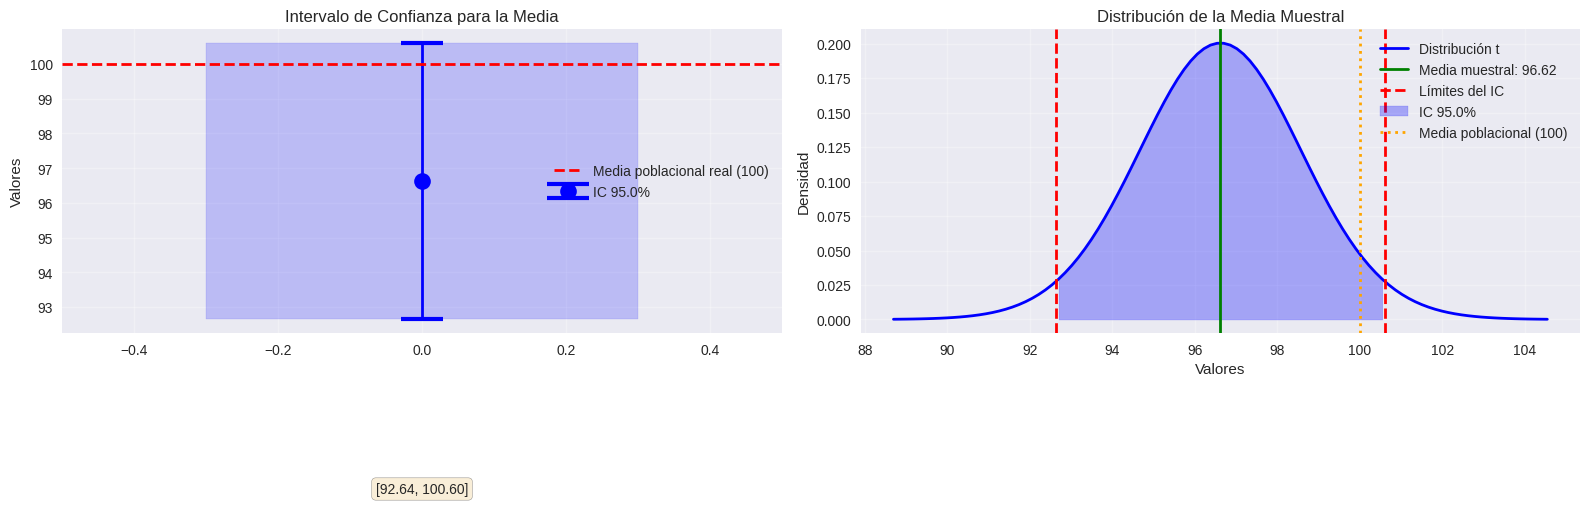

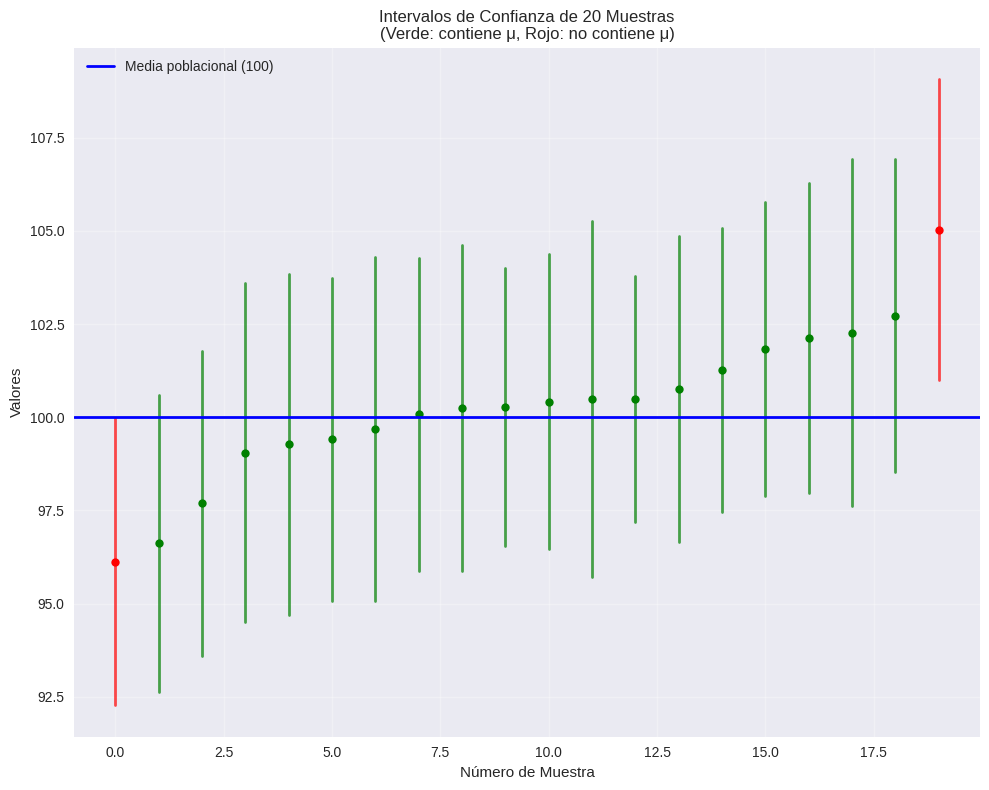


De 20 intervalos de confianza, 18 contienen la media poblacional real
Esperado: 19 ± 2


In [11]:
# Generar muestra
np.random.seed(42)
muestra = np.random.normal(100, 15, 50)  # Media real = 100, std = 15

# Calcular estadísticas muestrales
n = len(muestra)
media_muestral = np.mean(muestra)
std_muestral = np.std(muestra, ddof=1)  # ddof=1 para muestra

# Intervalo de confianza del 95% para la media
nivel_confianza = 0.95
alpha = 1 - nivel_confianza

# Usando t-distribution (cuando n < 30 o desconocemos la varianza poblacional)
t_critico = stats.t.ppf(1 - alpha/2, df=n-1)
error_estandar = std_muestral / np.sqrt(n)
margen_error = t_critico * error_estandar

ic_inferior = media_muestral - margen_error
ic_superior = media_muestral + margen_error

print(f"Media muestral: {media_muestral:.2f}")
print(f"Desviación estándar muestral: {std_muestral:.2f}")
print(f"\nIntervalo de confianza del {nivel_confianza*100}%:")
print(f"[{ic_inferior:.2f}, {ic_superior:.2f}]")
print(f"Margen de error: ±{margen_error:.2f}")

# Usando scipy (más directo)
ic_scipy = stats.t.interval(nivel_confianza, df=n-1, 
                            loc=media_muestral, 
                            scale=error_estandar)
print(f"\nUsando scipy: [{ic_scipy[0]:.2f}, {ic_scipy[1]:.2f}]")

# Visualización mejorada
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Intervalo de confianza con errorbar
axes[0].errorbar(0, media_muestral, yerr=margen_error, fmt='o', 
                 capsize=15, capthick=3, markersize=12, 
                 color='blue', label=f'IC {nivel_confianza*100}%', linewidth=2)
axes[0].axhline(100, color='r', linestyle='--', linewidth=2, label='Media poblacional real (100)')
axes[0].fill_between([-0.3, 0.3], ic_inferior, ic_superior, alpha=0.2, color='blue')
axes[0].set_xlim(-0.5, 0.5)
axes[0].set_ylabel('Valores')
axes[0].set_title('Intervalo de Confianza para la Media')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].text(0, ic_inferior - 5, f'[{ic_inferior:.2f}, {ic_superior:.2f}]', 
             ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Gráfico 2: Distribución muestral y región de confianza
x_dist = np.linspace(media_muestral - 4*error_estandar, media_muestral + 4*error_estandar, 100)
y_dist = stats.t.pdf((x_dist - media_muestral) / error_estandar, df=n-1) / error_estandar

axes[1].plot(x_dist, y_dist, 'b-', linewidth=2, label='Distribución t')
axes[1].axvline(media_muestral, color='green', linestyle='-', linewidth=2, label=f'Media muestral: {media_muestral:.2f}')
axes[1].axvline(ic_inferior, color='red', linestyle='--', linewidth=2, label='Límites del IC')
axes[1].axvline(ic_superior, color='red', linestyle='--', linewidth=2)
axes[1].fill_between(x_dist, 0, y_dist, where=(x_dist >= ic_inferior) & (x_dist <= ic_superior), 
                     alpha=0.3, color='blue', label=f'IC {nivel_confianza*100}%')
axes[1].axvline(100, color='orange', linestyle=':', linewidth=2, label='Media poblacional (100)')
axes[1].set_xlabel('Valores')
axes[1].set_ylabel('Densidad')
axes[1].set_title('Distribución de la Media Muestral')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualización adicional: Múltiples intervalos de confianza
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
np.random.seed(42)
n_muestras = 20
medias_ic = []
for i in range(n_muestras):
    muestra_sim = np.random.normal(100, 15, 50)
    media_sim = np.mean(muestra_sim)
    std_sim = np.std(muestra_sim, ddof=1)
    error_sim = std_sim / np.sqrt(50)
    t_crit = stats.t.ppf(1 - alpha/2, df=49)
    margen_sim = t_crit * error_sim
    medias_ic.append((media_sim, media_sim - margen_sim, media_sim + margen_sim))

# Ordenar por media para mejor visualización
medias_ic.sort(key=lambda x: x[0])

for i, (media, inf, sup) in enumerate(medias_ic):
    color = 'green' if (inf <= 100 <= sup) else 'red'
    ax.plot([i, i], [inf, sup], color=color, linewidth=2, alpha=0.7)
    ax.plot(i, media, 'o', color=color, markersize=6)

ax.axhline(100, color='blue', linestyle='-', linewidth=2, label='Media poblacional (100)')
ax.set_xlabel('Número de Muestra')
ax.set_ylabel('Valores')
ax.set_title(f'Intervalos de Confianza de {n_muestras} Muestras\n(Verde: contiene μ, Rojo: no contiene μ)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

contenidos = sum(1 for _, inf, sup in medias_ic if inf <= 100 <= sup)
print(f"\nDe {n_muestras} intervalos de confianza, {contenidos} contienen la media poblacional real")
print(f"Esperado: {int(nivel_confianza * n_muestras)} ± 2")


## 6. Pruebas de Hipótesis

Las pruebas de hipótesis permiten tomar decisiones sobre parámetros poblacionales basándose en evidencia muestral.

### Prueba t para una muestra


Media muestral: 99.18
Valor hipotético: 100

Estadístico t: -0.3336
p-valor: 0.7411

No rechazamos H0 (p >= 0.05). No hay evidencia suficiente de diferencia


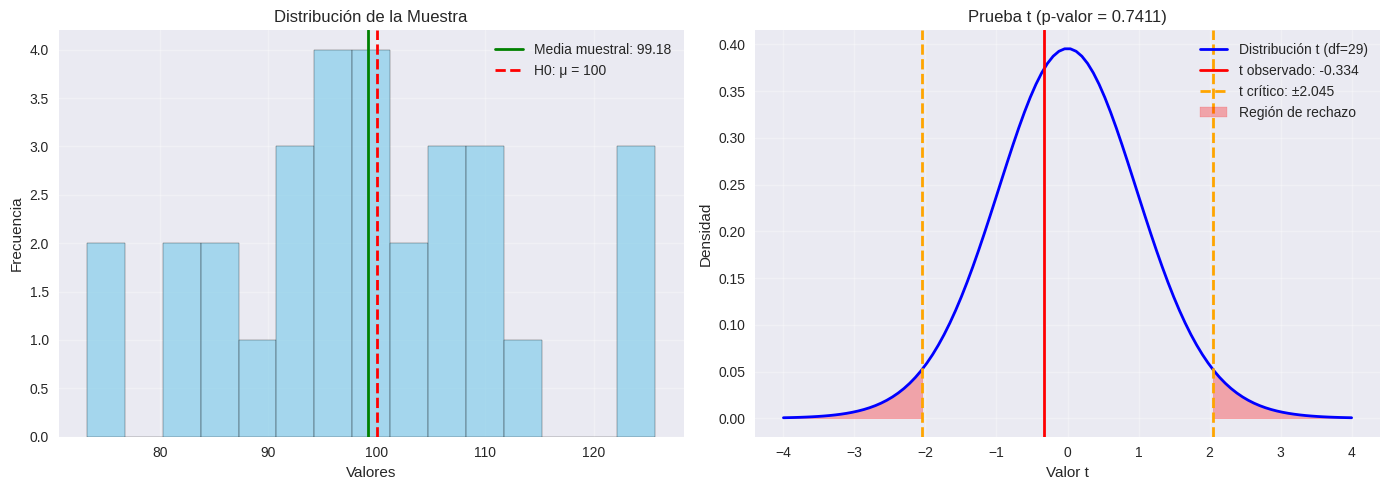


Prueba t de dos muestras independientes:
Media grupo A: 97.18
Media grupo B: 108.18
Estadístico t: -3.1030
p-valor: 0.0030
Rechazamos H0. Las medias son significativamente diferentes


/tmp/ipykernel_167933/3273308204.py:100: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot([grupo_a, grupo_b], labels=['Grupo A', 'Grupo B'],


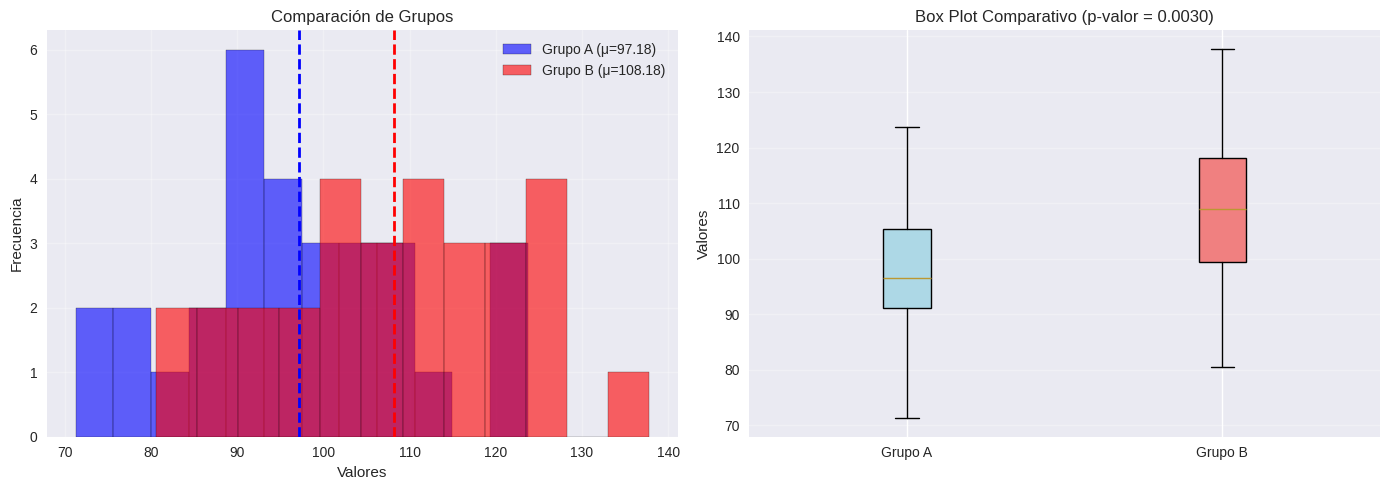

In [12]:
# Ejemplo: ¿La media de la muestra es diferente de 100?
np.random.seed(42)
muestra = np.random.normal(102, 15, 30)  # Media real = 102
valor_hipotesis = 100

# Prueba t de una muestra
t_statistic, p_value = stats.ttest_1samp(muestra, valor_hipotesis)

print(f"Media muestral: {np.mean(muestra):.2f}")
print(f"Valor hipotético: {valor_hipotesis}")
print(f"\nEstadístico t: {t_statistic:.4f}")
print(f"p-valor: {p_value:.4f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print(f"\nRechazamos H0 (p < {alpha}). La media es significativamente diferente de {valor_hipotesis}")
else:
    print(f"\nNo rechazamos H0 (p >= {alpha}). No hay evidencia suficiente de diferencia")

# Visualización de la prueba t de una muestra
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de la muestra con valor hipotético
axes[0].hist(muestra, bins=15, alpha=0.7, edgecolor='black', color='skyblue')
axes[0].axvline(np.mean(muestra), color='green', linestyle='-', linewidth=2, 
                label=f'Media muestral: {np.mean(muestra):.2f}')
axes[0].axvline(valor_hipotesis, color='red', linestyle='--', linewidth=2, 
                label=f'H0: μ = {valor_hipotesis}')
axes[0].set_xlabel('Valores')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de la Muestra')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Distribución t con región crítica
df = len(muestra) - 1
x_t = np.linspace(-4, 4, 100)
y_t = stats.t.pdf(x_t, df)
t_critico = stats.t.ppf(1 - alpha/2, df)

axes[1].plot(x_t, y_t, 'b-', linewidth=2, label=f'Distribución t (df={df})')
axes[1].axvline(t_statistic, color='red', linestyle='-', linewidth=2, 
                label=f't observado: {t_statistic:.3f}')
axes[1].axvline(t_critico, color='orange', linestyle='--', linewidth=2, 
                label=f't crítico: ±{t_critico:.3f}')
axes[1].axvline(-t_critico, color='orange', linestyle='--', linewidth=2)

# Región de rechazo
x_rechazo_sup = np.linspace(t_critico, 4, 50)
x_rechazo_inf = np.linspace(-4, -t_critico, 50)
axes[1].fill_between(x_rechazo_sup, 0, stats.t.pdf(x_rechazo_sup, df), 
                     alpha=0.3, color='red', label='Región de rechazo')
axes[1].fill_between(x_rechazo_inf, 0, stats.t.pdf(x_rechazo_inf, df), 
                     alpha=0.3, color='red')

axes[1].set_xlabel('Valor t')
axes[1].set_ylabel('Densidad')
axes[1].set_title(f'Prueba t (p-valor = {p_value:.4f})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Prueba t de dos muestras independientes
np.random.seed(42)
grupo_a = np.random.normal(100, 15, 30)
grupo_b = np.random.normal(110, 15, 30)  # Media diferente

t_stat, p_val = stats.ttest_ind(grupo_a, grupo_b)

print(f"\n{'='*50}")
print(f"Prueba t de dos muestras independientes:")
print(f"Media grupo A: {np.mean(grupo_a):.2f}")
print(f"Media grupo B: {np.mean(grupo_b):.2f}")
print(f"Estadístico t: {t_stat:.4f}")
print(f"p-valor: {p_val:.4f}")

if p_val < alpha:
    print(f"Rechazamos H0. Las medias son significativamente diferentes")
else:
    print(f"No rechazamos H0. No hay evidencia de diferencia significativa")

# Visualización de la prueba t de dos muestras
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramas comparativos
axes[0].hist(grupo_a, bins=12, alpha=0.6, edgecolor='black', color='blue', label=f'Grupo A (μ={np.mean(grupo_a):.2f})')
axes[0].hist(grupo_b, bins=12, alpha=0.6, edgecolor='black', color='red', label=f'Grupo B (μ={np.mean(grupo_b):.2f})')
axes[0].axvline(np.mean(grupo_a), color='blue', linestyle='--', linewidth=2)
axes[0].axvline(np.mean(grupo_b), color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Valores')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Comparación de Grupos')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot comparativo
bp = axes[1].boxplot([grupo_a, grupo_b], labels=['Grupo A', 'Grupo B'], 
                     patch_artist=True, vert=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightcoral')
axes[1].set_ylabel('Valores')
axes[1].set_title(f'Box Plot Comparativo (p-valor = {p_val:.4f})')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


### Prueba de Normalidad (Shapiro-Wilk)


Prueba de Normalidad (Shapiro-Wilk):

Datos normales:
  Estadístico: 0.9899
  p-valor: 0.6552
  Los datos siguen una distribución normal (p > 0.05)

Datos no normales (exponencial):
  Estadístico: 0.8406
  p-valor: 0.0000
  Los datos NO siguen una distribución normal (p <= 0.05)


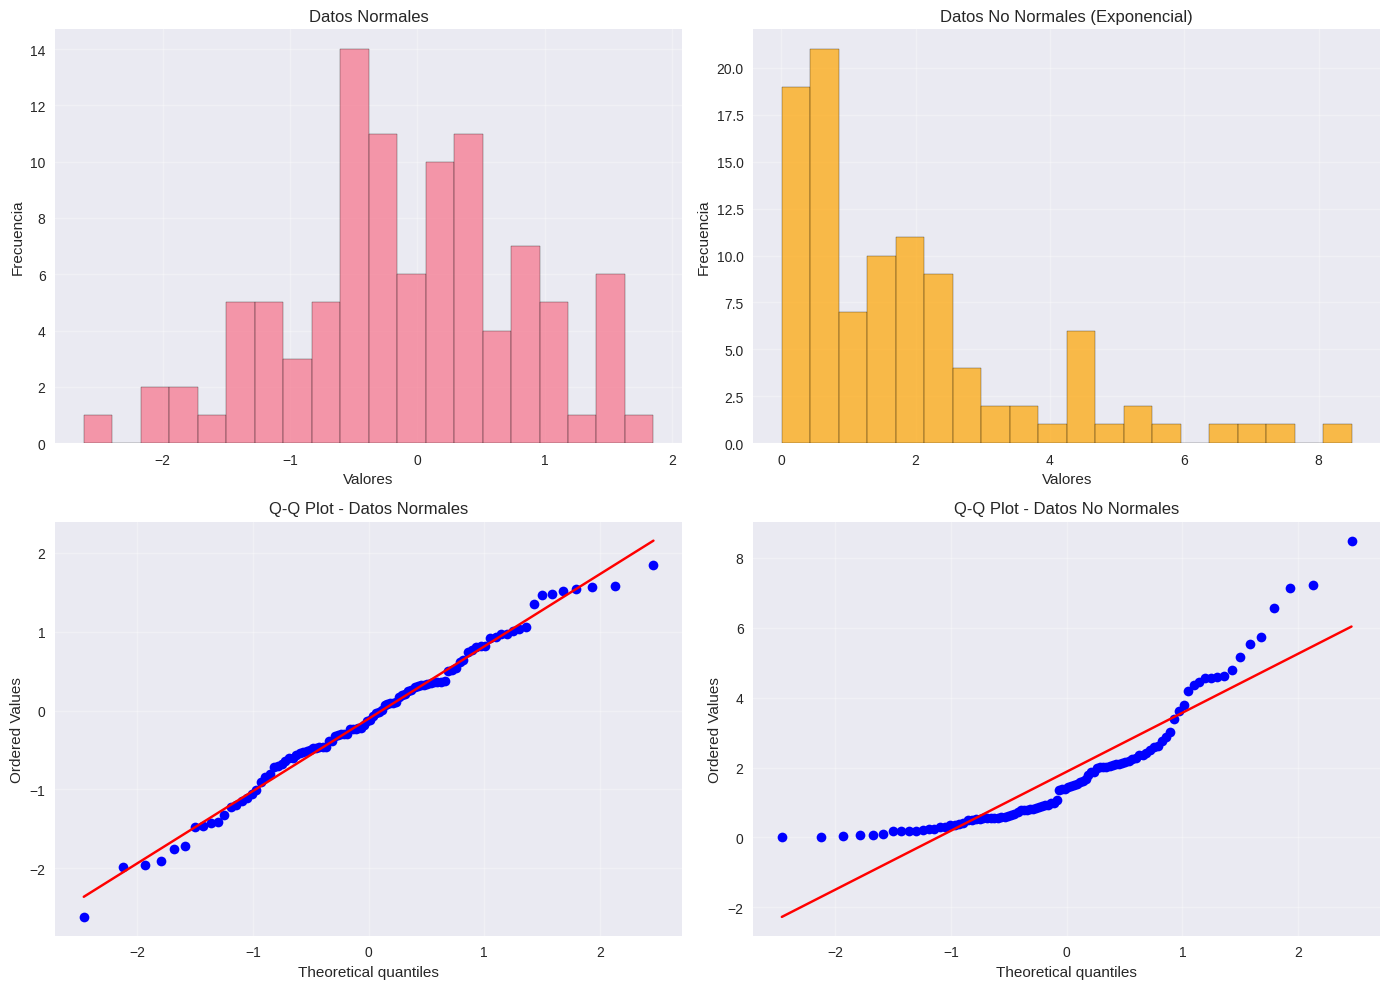

In [13]:
# Generar datos normales y no normales
np.random.seed(42)
datos_normales = np.random.normal(0, 1, 100)
datos_no_normales = np.random.exponential(2, 100)

# Prueba de Shapiro-Wilk
stat_norm, p_norm = stats.shapiro(datos_normales)
stat_no_norm, p_no_norm = stats.shapiro(datos_no_normales)

print("Prueba de Normalidad (Shapiro-Wilk):")
print(f"\nDatos normales:")
print(f"  Estadístico: {stat_norm:.4f}")
print(f"  p-valor: {p_norm:.4f}")
if p_norm > 0.05:
    print(f"  Los datos siguen una distribución normal (p > 0.05)")
else:
    print(f"  Los datos NO siguen una distribución normal (p <= 0.05)")

print(f"\nDatos no normales (exponencial):")
print(f"  Estadístico: {stat_no_norm:.4f}")
print(f"  p-valor: {p_no_norm:.4f}")
if p_no_norm > 0.05:
    print(f"  Los datos siguen una distribución normal (p > 0.05)")
else:
    print(f"  Los datos NO siguen una distribución normal (p <= 0.05)")

# Visualización con Q-Q plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogramas
axes[0, 0].hist(datos_normales, bins=20, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Datos Normales')
axes[0, 0].set_xlabel('Valores')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(datos_no_normales, bins=20, alpha=0.7, edgecolor='black', color='orange')
axes[0, 1].set_title('Datos No Normales (Exponencial)')
axes[0, 1].set_xlabel('Valores')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plots
stats.probplot(datos_normales, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot - Datos Normales')
axes[1, 0].grid(True, alpha=0.3)

stats.probplot(datos_no_normales, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot - Datos No Normales')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 7. Aplicaciones en Machine Learning e IA

### Normalización y Estandarización


Estadísticas originales:
Media: [  97.92306965    5.02230459 1012.97925062]
Std: [ 18.07232353   0.94888864 215.76956925]

Después de Min-Max (0-1):
Media: [0.5625862  0.41843086 0.46605077]
Std: [0.20205981 0.20454857 0.15207894]
Min: [0. 0. 0.]
Max: [1. 1. 1.]

Después de Estandarización (Z-score):
Media: [-1.15601972e-15  4.70734562e-16 -6.70574707e-16]
Std: [1. 1. 1.]


/tmp/ipykernel_167933/1484909212.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(datos, labels=['Var1', 'Var2', 'Var3'])
/tmp/ipykernel_167933/1484909212.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(datos_minmax, labels=['Var1', 'Var2', 'Var3'])
/tmp/ipykernel_167933/1484909212.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot(datos_std, labels=['Var1', 'Var2', 'Var3'])


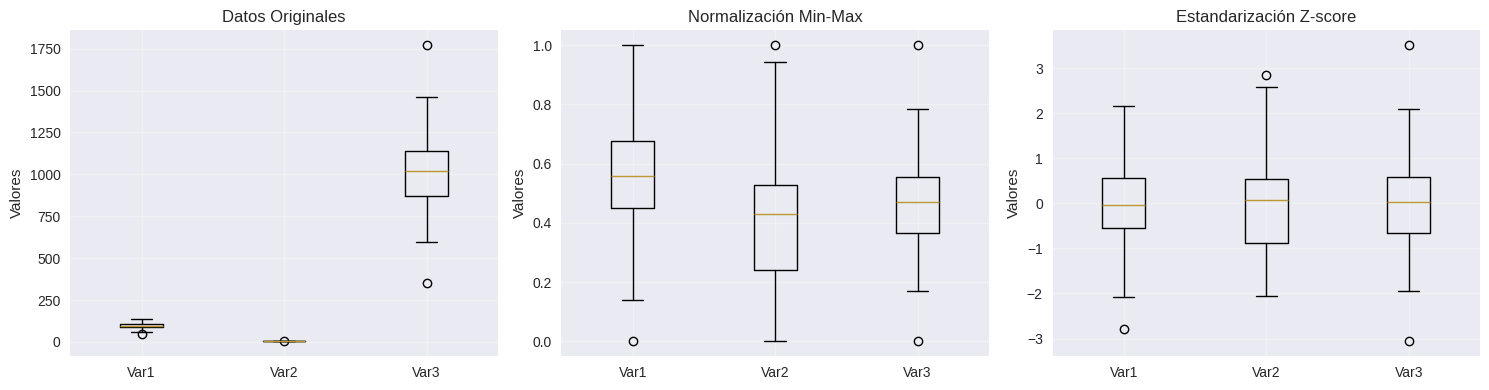

In [14]:
# Datos originales con diferentes escalas
np.random.seed(42)
datos = np.array([
    np.random.normal(100, 20, 100),  # Variable 1: escala 100
    np.random.normal(5, 1, 100),     # Variable 2: escala 5
    np.random.normal(1000, 200, 100) # Variable 3: escala 1000
]).T

# Normalización Min-Max (escala 0-1)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()
datos_minmax = scaler_minmax.fit_transform(datos)

# Estandarización Z-score (media=0, std=1)
scaler_std = StandardScaler()
datos_std = scaler_std.fit_transform(datos)

# Comparación
print("Estadísticas originales:")
print(f"Media: {np.mean(datos, axis=0)}")
print(f"Std: {np.std(datos, axis=0)}")

print("\nDespués de Min-Max (0-1):")
print(f"Media: {np.mean(datos_minmax, axis=0)}")
print(f"Std: {np.std(datos_minmax, axis=0)}")
print(f"Min: {np.min(datos_minmax, axis=0)}")
print(f"Max: {np.max(datos_minmax, axis=0)}")

print("\nDespués de Estandarización (Z-score):")
print(f"Media: {np.mean(datos_std, axis=0)}")
print(f"Std: {np.std(datos_std, axis=0)}")

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].boxplot(datos, labels=['Var1', 'Var2', 'Var3'])
axes[0].set_title('Datos Originales')
axes[0].set_ylabel('Valores')
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(datos_minmax, labels=['Var1', 'Var2', 'Var3'])
axes[1].set_title('Normalización Min-Max')
axes[1].set_ylabel('Valores')
axes[1].grid(True, alpha=0.3)

axes[2].boxplot(datos_std, labels=['Var1', 'Var2', 'Var3'])
axes[2].set_title('Estandarización Z-score')
axes[2].set_ylabel('Valores')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Teorema del Límite Central (TLC)

El TLC es fundamental en estadística y ML: establece que la distribución de las medias muestrales se aproxima a una normal, independientemente de la distribución original.


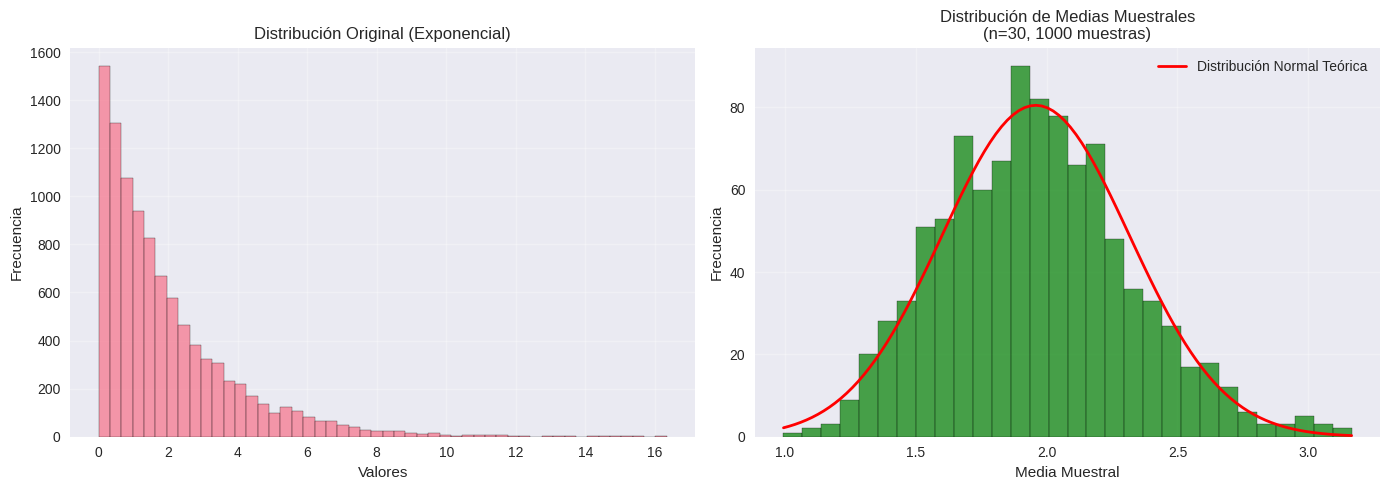

Media de la distribución original: 1.95
Media de las medias muestrales: 1.96
Std de la distribución original: 1.95
Std de las medias muestrales: 0.36
Std teórica (σ/√n): 0.36


In [15]:
# Demostración del TLC con distribución no normal
np.random.seed(42)

# Distribución original (exponencial - no normal)
distribucion_original = np.random.exponential(2, 10000)

# Muestreo: tomar muchas muestras y calcular sus medias
n_muestras = 1000
tamano_muestra = 30
medias_muestrales = []

for _ in range(n_muestras):
    muestra = np.random.choice(distribucion_original, tamano_muestra, replace=False)
    medias_muestrales.append(np.mean(muestra))

medias_muestrales = np.array(medias_muestrales)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribución original
axes[0].hist(distribucion_original, bins=50, alpha=0.7, edgecolor='black')
axes[0].set_title('Distribución Original (Exponencial)')
axes[0].set_xlabel('Valores')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True, alpha=0.3)

# Distribución de medias muestrales
axes[1].hist(medias_muestrales, bins=30, alpha=0.7, edgecolor='black', color='green')
axes[1].set_title(f'Distribución de Medias Muestrales\n(n={tamano_muestra}, {n_muestras} muestras)')
axes[1].set_xlabel('Media Muestral')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True, alpha=0.3)

# Superponer distribución normal teórica
media_medias = np.mean(medias_muestrales)
std_medias = np.std(medias_muestrales)
x = np.linspace(medias_muestrales.min(), medias_muestrales.max(), 100)
y = norm.pdf(x, media_medias, std_medias) * len(medias_muestrales) * (medias_muestrales.max() - medias_muestrales.min()) / 30
axes[1].plot(x, y, 'r-', linewidth=2, label='Distribución Normal Teórica')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Media de la distribución original: {np.mean(distribucion_original):.2f}")
print(f"Media de las medias muestrales: {media_medias:.2f}")
print(f"Std de la distribución original: {np.std(distribucion_original):.2f}")
print(f"Std de las medias muestrales: {std_medias:.2f}")
print(f"Std teórica (σ/√n): {np.std(distribucion_original)/np.sqrt(tamano_muestra):.2f}")


## 8. Resumen y Conceptos Clave

### Conceptos Fundamentales

1. **Estadística Descriptiva**: Resume datos mediante medidas de tendencia central y dispersión
2. **Distribuciones de Probabilidad**: Modelan el comportamiento de variables aleatorias
3. **Correlación**: Mide relaciones lineales entre variables
4. **Inferencia Estadística**: Permite hacer conclusiones sobre poblaciones a partir de muestras
5. **Pruebas de Hipótesis**: Evalúan afirmaciones sobre parámetros poblacionales

### Aplicaciones en ML/IA

- **Preprocesamiento**: Normalización, detección de outliers
- **Feature Engineering**: Selección de variables basada en correlación
- **Validación de Modelos**: Intervalos de confianza para métricas
- **Análisis Exploratorio**: Entender la distribución y características de los datos
- **Teorema del Límite Central**: Justifica el uso de distribuciones normales en muchos algoritmos

### Librerías Principales

- **NumPy**: Cálculos estadísticos básicos
- **Pandas**: Análisis de datos estructurados
- **SciPy**: Pruebas estadísticas avanzadas
- **Matplotlib/Seaborn**: Visualización
- **Scikit-learn**: Preprocesamiento y normalización
